<a href="https://colab.research.google.com/github/gustavovarella/Projeto_m4/blob/main/PROJETO_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória - Projeto M4 - Squad 7

---


<left><img alt="Analisando Airbnb" width="27%" src="https://www.resilia.com.br/wp-content/uploads/2021/08/logo.png"></left>
<left><img alt="Squad7" width="15%" src="https://drive.google.com/uc?id=1DG9VkOly916qcx6w6CHGYjkeLXEewut4"></left>
<right><img alt="gov.br" width="11%" src="https://play-lh.googleusercontent.com/qn6t9aaqbxUJDl9SMRlBkgG6SArPRfk_g_m5lyG6SjhpUfiW1PsHuJ6jSuL9GVDqnA"></right>



### **1. Objetivo do projeto:**

Realizar uma análise exploratória relacionada à série
histórica de preço de venda da gasolina e do etanol dos últimos dois meses do ano atual.

##### **1.1. Pacotes Python e coleta de dados**

Essa etapa tem como finalidade realizar a coleta dos dados sem nenhum tratatamento, descrever, explorar os mesmos e por fim avaliar a qualidade e integridade.

In [ ]:
# Importação dos pacotes Python
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

Neste projeto foram utilizados dados dos últimos dois meses do ano atual (Julho e Agosto de 2022)

#####**1.2 Criação do DataFrame do mês de julho (df_julho)**

In [ ]:
#Criação do DataFrame do mês de julho (df_julho)

df_julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv', sep=';', encoding='ISO-8859-1')
df_julho.columns = ['Regiao', 'Estado','Municipio','Revenda','CNPJ','Rua','Numero','Complemento','Bairro','CEP','Produto','Data da Coleta','Valor_de_Venda','Valor de Compra','Unidade de Medida','Bandeira']

#####**1.3 Criação do DataFrame do mês de Agosto (df_agosto)**

In [ ]:

df_agosto = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv', sep=';', encoding='ISO-8859-1')
df_agosto.columns = ['Regiao', 'Estado','Municipio','Revenda','CNPJ','Rua','Numero','Complemento','Bairro','CEP','Produto','Data da Coleta','Valor_de_Venda','Valor de Compra','Unidade de Medida','Bandeira']

#####**1.4 União dos meses  de Julho (df_julho) e Agosto (df_agosto) em um único DataFrame (df_completo)**

In [ ]:
frames = [df_agosto,df_julho]
df_completo = pd.concat(frames)

### **2. Descrevendo os dados**

Uma vez que possuímos um Dataset com todas os dados que serão usados para o desenvolvimento do projeto, será avaliado a dimensão do Dataset e tipos de variáveis presentes.

In [ ]:
df_completo.shape

(127176, 16)

Com a função .shape foi possível concluir que o Dataset possui incialmente um total de **127176** linhas/entradas, e **16** colunas/variáveis. Em seguida, é realizada a análise do tipo de variável presente nas 16 colunas, e em seguida é apresentado um dicionário das variáveis presentes.

In [ ]:
display(df_completo.dtypes)

Regiao                object
Estado                object
Municipio             object
Revenda               object
CNPJ                  object
Rua                   object
Numero                object
Complemento           object
Bairro                object
CEP                   object
Produto               object
Data da Coleta        object
Valor_de_Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

**Dicionário das variáveis**

* `Região` - Região onde cada estabelecimento está localizado.
* `Estado` - Estado onde cada estabelecimento está localizado.
* `Municipio` - Município onde cada estabelecimento está localizado.
* `Revenda` - Nome de cada estabelecimento.
* `CNPJ` - Cadastro Nacional de Pessoas Jurídicas. Nesse caso, de cada estabelecimento.
* `Rua` - Rua onde cada estabelecimento está localizado.
* `Numero` - Número do endereço onde cada estabelecimento está localizado.
* `Complemento` - Complemento ao endereço onde cada estabelecimento está localizado.
* `Bairro` - Bairro onde cada estabelecimento está localizado.
* `CEP` - Código de Endereço Postal de cada estabelecimento.
* `Produto` - Tipo de produto vendido pelos estabelecimentos.
* `Data de Coleta` - Data em que foi realizada a coleta do dado.
* `Valor de Venda` - Valor de Venda do Produto para o cliente.
* `Valor de Compra` - Valor de Compra do Produto pelo estabelecimento.
* `Unidade de Medida` - Unidade de Medida usada na venda do produto.
* `Bandeira` - Bandeira do estabelecimento que realiza a venda do produto.

#### **2.1 - Estatísticas Descritivas**




Primeiro será avaliado a qualidade dos dados presentes, e sua integridade (% de valores nulos dentro de cada variável)

In [ ]:
(df_completo.isnull().sum() / df_completo.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.787075
Bairro               0.003240
Numero               0.000558
Regiao               0.000000
Estado               0.000000
Municipio            0.000000
Revenda              0.000000
CNPJ                 0.000000
Rua                  0.000000
CEP                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor_de_Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

* A coluna **`Valor de Compra`** possui quase 100% dos seus valores faltantes.
* A coluna **`Complemento`** possui cerca de 79% dos seus valores faltantes.
* A coluna **`Bairro`** possui cerca de 0,3% dos seus valores faltantes.
* A coluna **`Numero`** possui cerca de 0,06% dos seus valores faltantes.


Ao analisar as perguntas que serão respondidas pelo projeto (item 3.1) e o resultado da avaliação de variáveis com valores nulos é possível concluir que apenas 2 colunas possuem um valor expressivo de valores faltantes. No entanto, ambas não terão impacto no desenvolvimento do projeto, visto que trazem dados que não serão utilizados na solução das perguntas.

Por fim, após análise inicial das variáveis e integridade dos dados, teremos o primeiro contato com o nosso Dataset.

In [ ]:
#Visualização das primeiras cinco linhas do Dataset.
df_completo.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,CEP,Produto,Data da Coleta,Valor_de_Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,"5,99",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,"4,99",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,"5,79",NaN,R$ / litro,BRANCA


In [ ]:
#Visualização das últimas cinco linhas do Dataset.
df_completo.tail()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,CEP,Produto,Data da Coleta,Valor_de_Venda,Valor de Compra,Unidade de Medida,Bandeira
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,32.924.614/0001-56,RUA CASTRO ALVES,2400,NaN,CATALAO,35501-205,GASOLINA,29/07/2022,"5,38",NaN,R$ / litro,BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA ADITIVADA,29/07/2022,"5,46",NaN,R$ / litro,BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA,29/07/2022,"5,46",NaN,R$ / litro,BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA ADITIVADA,29/07/2022,"5,68",NaN,R$ / litro,BRANCA
57631,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA,29/07/2022,"5,68",NaN,R$ / litro,BRANCA


### **3 - Limpeza do Banco de Dados**

Agora será iniciada a etapa de limpeza do dataset, ou seja, remover as variáveis que não possuem valor agregado para a nossa análise.

##### **3.1 - Remoção de colunas não relevantes para análise**

As variáveis/colunas que não serão utilizadas na solução das perguntas e/ou possuem uma quantidade expressiva de valores nulos com  objetivo de melhorar a execução do código serão removidas. 

In [ ]:
df_completo.drop(["Valor de Compra","Unidade de Medida","CNPJ","Rua","Numero","Complemento","CEP"], axis=1, inplace=True)
df_completo

,Regiao,Estado,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor_de_Venda,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,BOM SUCESSO,ETANOL,01/08/2022,"4,79",VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,BOM SUCESSO,GASOLINA,01/08/2022,"5,59",VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA ADITIVADA,01/08/2022,"5,99",BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,ETANOL,01/08/2022,"4,99",BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA,01/08/2022,"5,79",BRANCA
...,...,...,...,...,...,...,...,...,...
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,CATALAO,GASOLINA,29/07/2022,"5,38",BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA ADITIVADA,29/07/2022,"5,46",BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA,29/07/2022,"5,46",BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,VOLTA REDONDA,GASOLINA ADITIVADA,29/07/2022,"5,68",BRANCA


##### **3.2 - Remoção de duplicatas**

In [ ]:
duplicados = df_completo[df_completo.duplicated(keep='first')]
print(duplicados)

      Regiao Estado     Municipio  \
2167       S     RS  SANTO ANGELO   
2168       S     RS  SANTO ANGELO   
2169       S     RS  SANTO ANGELO   
3616      SE     SP     BEBEDOURO   
3617      SE     SP     BEBEDOURO   
...      ...    ...           ...   
56965     SE     MG       CURVELO   
57302      N     PA    ANANINDEUA   
57319     NE     CE        IGUATU   
57595      S     RS  PORTO ALEGRE   
57597      S     RS  PORTO ALEGRE   

                                                 Revenda    Bairro  \
2167                          POSTO SANTA TEREZINHA LTDA    CENTRO   
2168                          POSTO SANTA TEREZINHA LTDA    CENTRO   
2169                          POSTO SANTA TEREZINHA LTDA    CENTRO   
3616                       POSTO DO LAGO BEBEDOURO LTDA.    CENTRO   
3617                       POSTO DO LAGO BEBEDOURO LTDA.    CENTRO   
...                                                  ...       ...   
56965                       POSTO PASSOS & MONTEIRO LTDA    CENTR

In [ ]:
df_completo.drop_duplicates(keep='first', inplace=True)
df_completo

,Regiao,Estado,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor_de_Venda,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,BOM SUCESSO,ETANOL,01/08/2022,"4,79",VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,BOM SUCESSO,GASOLINA,01/08/2022,"5,59",VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA ADITIVADA,01/08/2022,"5,99",BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,ETANOL,01/08/2022,"4,99",BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA,01/08/2022,"5,79",BRANCA
...,...,...,...,...,...,...,...,...,...
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,CATALAO,GASOLINA,29/07/2022,"5,38",BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA ADITIVADA,29/07/2022,"5,46",BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA,29/07/2022,"5,46",BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,VOLTA REDONDA,GASOLINA ADITIVADA,29/07/2022,"5,68",BRANCA


##### **3.3 - Alterando o tipo da variável 'Valor de Venda'**

Para o desenvolvimento do Projeto, convertemos a formatação da variável 'Valor_de_Venda', alterando a separação entre a parte inteira e decimal de ',' para '.', e garantimos que o seu tipo seja 'float' (valor decimais).

In [ ]:
df_completo['Valor_de_Venda'] = df_completo['Valor_de_Venda'].str.replace(',', '.')
df_completo['Valor_de_Venda']= df_completo['Valor_de_Venda'].astype(float)

##### **3.2 - Análise de Outliers**

A verificação de Outliers será realizada em quatro passos:
* 1 - Resumo Estatístico dos dados presentes utilizando a função .describe()
* 2 - Visualização do gráfico de histograma e boxplot
* 3 - Análise da Amplitude Interquartil
* 4 - Decisão final sobre remoção

##### **3.2 - Visualização do gráfico de histograma e boxplot da variável 'Valor_de_Venda'**

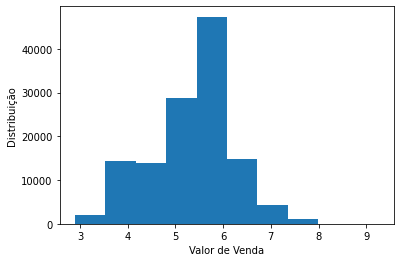

In [ ]:
# usar boxplot na visualização de outliers.
plt.xlabel ('Valor de Venda')
plt.ylabel ('Distribuição')
plt.hist(x = df_completo['Valor_de_Venda']);

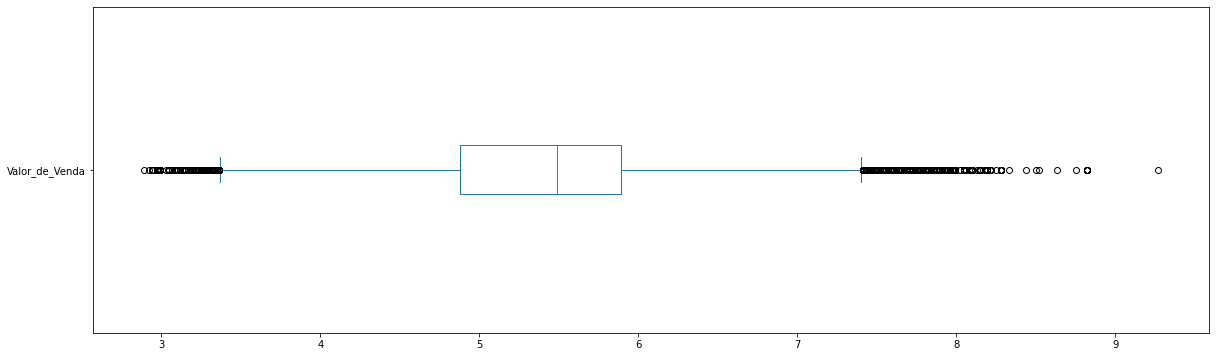

In [ ]:
df_completo['Valor_de_Venda'].plot.box(vert = False, figsize = (20,6));

Analisando o gráfico de histograma e boxplot percebemos os primeiros indícios da presença de outliers. No entanto, é necessário um refinamento maior na análise, comparando os principais cálculos estatísticos a fim de confirmar a presença de outliers e seu impacto.

In [ ]:
#Cálculos estatísticos do dataset completo
df_completo['Valor_de_Venda'].describe()

count    126696.000000
mean          5.354935
std           0.860794
min           2.890000
25%           4.880000
50%           5.490000
75%           5.890000
max           9.270000
Name: Valor_de_Venda, dtype: float64

Com a função .describe() encontramos os primeiros indícios de Outliers. Comparando, por exemplo, o valor máximo da variável 'Valor_de_Venda', **9.27**, com o Q3, **5.89**, observamos que o maior valor do nosso dataset é cerca de **58%** maior que 75% de todos os valores, e cerca de **73%** maior que a média dessa variável.


Agora será utilizado o metódo **Análise da Amplitude Interquartil** para a avaliação de todos os valores que possam ou não se enquadrar como Outliers. 

Esse método tem como parâmetros três variáveis, sendo elas: 

* IIQ - Intervalo InterQuartil (Q3 - Q1)
* Q1 - Primerio Quartil (25%)
* Q3 - Terceiro Quartil (75)

Serão considerados valores OutLiers os que não respeitarem as seguintes regras:
* Outlier abaixo: valor da variável < Q1 - FIG * 1.5
* Outlier acima: valor da variável > Q3 + FIG * 1.5


#####  **3.3 - Desenvolvimento da Análise de Amplitude Interquartil**

In [ ]:
#Geração das variáveis Q1, Q3 e FIG
Q1 = df_completo['Valor_de_Venda'].quantile(0.25)
Q3 = df_completo['Valor_de_Venda'].quantile(0.75)
IIQ = Q3 - Q1
IIQ


1.0099999999999998

In [ ]:
outlier_baixo = Q1 - (1.5 * IIQ)
outlier_baixo

3.365

In [ ]:
outlier_alto = Q3 + (1.5 * IIQ)
outlier_alto

7.404999999999999

In [ ]:
#Análise dos valores, e remoção dos que forem considerados Outliers.
df_completo_copy = df_completo.drop(df_completo[(df_completo.Valor_de_Venda < outlier_baixo) | (df_completo.Valor_de_Venda > outlier_alto)].index)
df_completo_copy

,Regiao,Estado,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor_de_Venda,Bandeira
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,BOM SUCESSO,GASOLINA,01/08/2022,5.59,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA ADITIVADA,01/08/2022,5.99,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,ETANOL,01/08/2022,4.99,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA,01/08/2022,5.79,BRANCA
5,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,CANAFISTULA,GASOLINA ADITIVADA,01/08/2022,6.09,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,CATALAO,GASOLINA,29/07/2022,5.38,BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA ADITIVADA,29/07/2022,5.46,BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA,29/07/2022,5.46,BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,VOLTA REDONDA,GASOLINA ADITIVADA,29/07/2022,5.68,BRANCA


In [ ]:
df_completo_copy.shape

(123965, 9)

Após a execução da Análise de Amplitude InterQuartil é possível observar que **2738** linhas foram removidas do nosso Dataset, eliminando assim possíveis disturbios na solução das perguntas.

In [ ]:
df_completo_copy.describe()

,Valor_de_Venda
count,123965.000000
mean,5.347514
std,0.828911
min,3.370000
25%,4.880000
50%,5.490000
75%,5.890000
max,7.400000


##### **3.4 - Resultado final da análise de outliers**

Comparando o dataset original com o dataset sem a presença de outliers é possível concluir que:
* Foram removidas **2738** linhas. O que representa apenas **2.16%** da quantidade total de linhas.
* A média teve uma mudança ínfima. Indo de **5.354** para **5.347** (R$/L)
* Os valores do Primeiro e Terceiro Quartil não tiveram alterações.
* O desvio Padrão praticamente não se alterou. No Dataset original seu valor é de **0.860**, e no dataset sem outliers o seu valor é de **0.828**. Variação de **3.72%** apenas, confirmando que a dispersão em torno da média pouco se alterou.

**Baseado no resultado da análise acima, decidiu-se manter os outliers dentro do dataset, visto que pouco impactam nas variáveis que serão utilizadas na resolução das perguntas.**

##### **4.1. Análise Exploratória de Dados - Problemas Investigados no Projeto de DS**

* 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e
da gasolina tiveram uma de queda ou diminuição?
* 2. Qual o preço médio da gasolina e do etanol nesses dois meses?
* 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
* 4. Qual o preço médio da gasolina e do etanol por estado?
* 5. Qual o município que possui o menor preço para a gasolina e para o etanol?
* 6. Qual o município que possui o maior preço para a gasolina e para o etanol?
* 7. Qual a região que possui o maior valor médio da gasolina?
* 8. Qual a região que possui o menor valor médio do etanol?
* 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
* 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

*1*. **Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma de queda ou diminuição?**

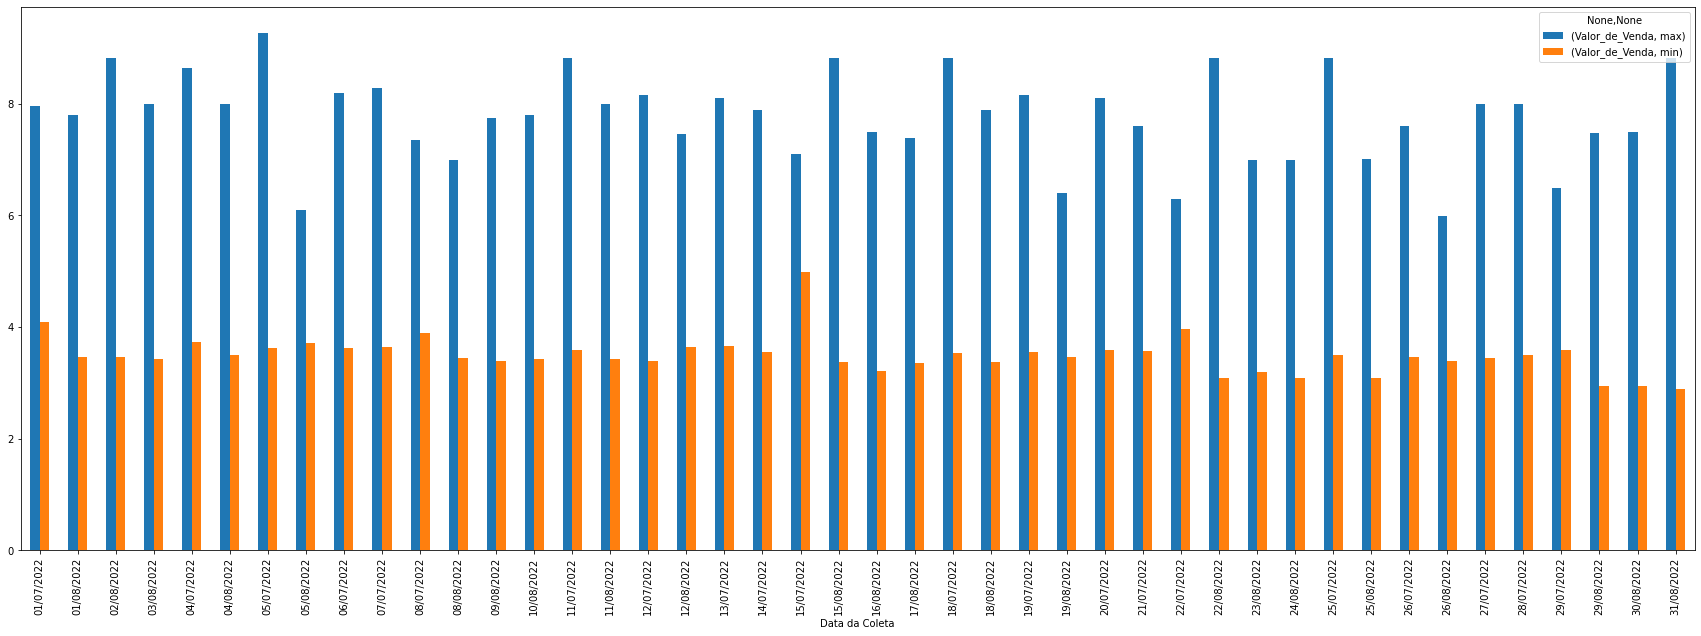

In [ ]:
df_comportamento = df_completo
df_comportamento.groupby(['Data da Coleta'])['Valor_de_Venda',].agg(['max','min']).plot(kind='bar', figsize=(30,10))

*1.1*. **Os valores do etanol e da gasolina tiveram uma de queda ou diminuição?**





In [ ]:
df_comportamento.groupby(['Data da Coleta', 'Produto'])['Valor_de_Venda',].agg(['max','min'])

Valor_de_Venda      
                                             max   min
Data da Coleta Produto                                
01/07/2022     ETANOL                       7.65  4.09
               GASOLINA                     7.77  5.99
               GASOLINA ADITIVADA           7.95  6.04
01/08/2022     ETANOL                       7.19  3.47
               GASOLINA                     7.39  4.88
...                                          ...   ...
30/08/2022     GASOLINA                     6.99  4.45
               GASOLINA ADITIVADA           7.49  4.47
31/08/2022     ETANOL                       6.96  2.89
               GASOLINA                     7.00  4.19
               GASOLINA ADITIVADA           8.82  4.29

[132 rows x 2 columns]

*2*. **Qual o preço médio da gasolina e do etanol nesses dois meses?**

In [ ]:
df_media = df_completo
df_media.groupby(['Produto'])['Valor_de_Venda'].agg(['median','mean'])

,median,mean
Produto,,
ETANOL,4.38,4.504968
GASOLINA,5.67,5.711296
GASOLINA ADITIVADA,5.84,5.887914


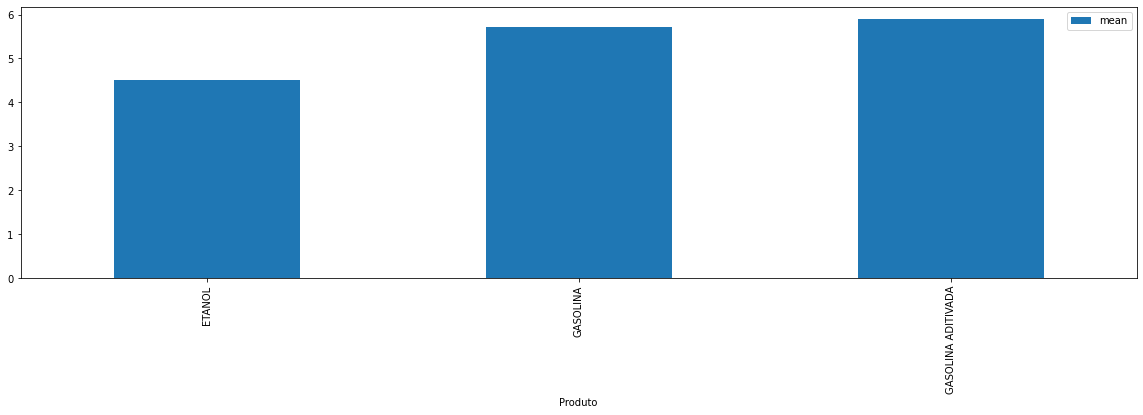

In [ ]:
df_combustivel = df_completo
df_combustivel.groupby(['Produto'])['Valor_de_Venda'].agg(['mean']).plot(kind='bar', figsize=(20,5))

* Média da gasolina e do etanol nos meses de Julho e Agosto de 2022.

*3*. **Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

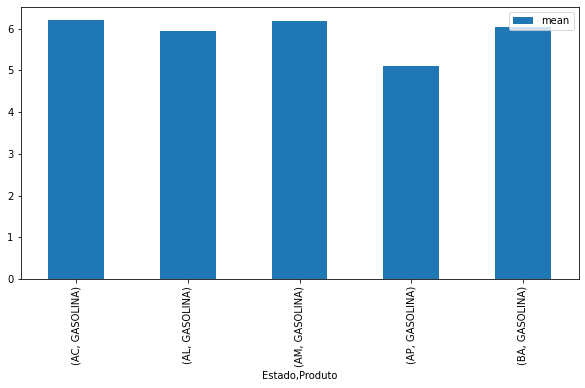

In [ ]:
df_completo.query('Produto== "GASOLINA"').groupby(['Estado','Produto'])['Valor_de_Venda'].agg(['mean']).head(5).plot(kind='bar', figsize=(10,5));

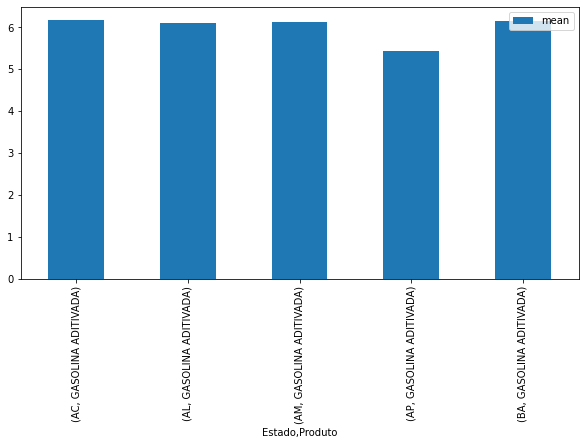

In [ ]:
df_completo.query('Produto== "GASOLINA ADITIVADA"').groupby(['Estado','Produto'])['Valor_de_Venda'].agg(['mean']).head(5).plot(kind='bar', figsize=(10,5));

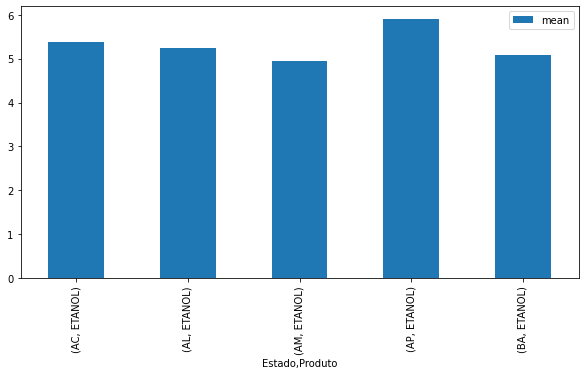

In [ ]:
df_completo.query('Produto== "ETANOL"').groupby(['Estado','Produto'])['Valor_de_Venda'].agg(['mean']).head(5).plot(kind='bar', figsize=(10,5));

*4*. **Qual o preço médio da gasolina e do etanol por estado?**

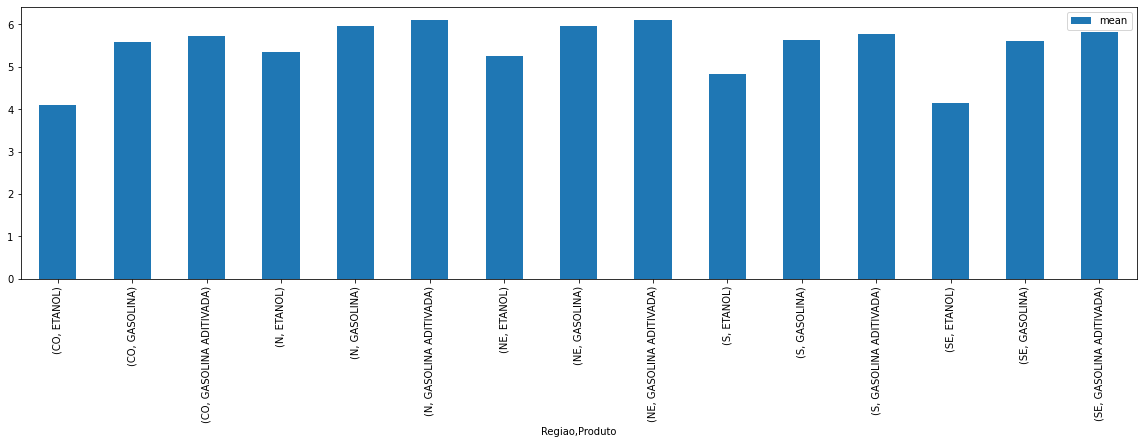

In [ ]:
# valor de venda máximo, minimo, medio e mediana de combustível por estado
df_completo_comb = df_completo
df_completo_comb.groupby(['Regiao','Produto'])['Valor_de_Venda'].agg(['mean']).plot(kind='bar', figsize=(20,5));

*5*. **Qual o município que possui o menor preço para a gasolina e para o etanol?**

In [ ]:
#5. Qual municipio possui o menor preço para a gasolina e para o etanol?

df_produto_municipio = df_completo.groupby(['Produto', 'Municipio'])
df_minima_municipio = df_produto_municipio[['Valor_de_Venda']].min()

#Etanol

df_min_municipio_etanol = df_minima_municipio.loc['ETANOL'].sort_values(by = 'Valor_de_Venda')
df_min_municipio_etanol = df_min_municipio_etanol.reset_index().head(1)
df_min_municipio_etanol['Produto'] = 'Etanol'

#Gasolina

df_min_municipio_gasolina = df_minima_municipio.loc['GASOLINA'].sort_values(by = 'Valor_de_Venda')
df_min_municipio_gasolina = df_min_municipio_gasolina.reset_index().head(1)
df_min_municipio_gasolina['Produto'] = 'Gasolina'

#Gasolina Aditivada

df_min_municipio_gasolina_adt = df_minima_municipio.loc['GASOLINA ADITIVADA'].sort_values(by = 'Valor_de_Venda')
df_min_municipio_gasolina_adt = df_min_municipio_gasolina_adt.reset_index().head(1)
df_min_municipio_gasolina_adt['Produto'] = 'Gasolina Aditivada'

df_minimos_municipio = pd.concat([df_min_municipio_etanol,df_min_municipio_gasolina,df_min_municipio_gasolina_adt])

#criando tabela final (minimas)com resultados
minimas_por_municipio = df_minimos_municipio[['Produto','Municipio','Valor_de_Venda']]
minimas_por_municipio

,Produto,Municipio,Valor_de_Venda
0,Etanol,PRESIDENTE PRUDENTE,2.89
0,Gasolina,PASSO FUNDO,4.13
0,Gasolina Aditivada,PASSO FUNDO,4.13


*6*. **Qual o município que possui o maior preço para a gasolina e para o etanol?**

In [ ]:
df_maxima_municipio = df_produto_municipio[['Valor_de_Venda']].max()

#Etanol

df_max_municipio_etanol = df_maxima_municipio.loc['ETANOL'].sort_values(by = 'Valor_de_Venda')
df_max_municipio_etanol = df_max_municipio_etanol.reset_index().head(1)
df_max_municipio_etanol['Produto'] = 'Etanol'

#Gasolina

df_max_municipio_gasolina = df_maxima_municipio.loc['GASOLINA'].sort_values(by = 'Valor_de_Venda')
df_max_municipio_gasolina = df_max_municipio_gasolina.reset_index().head(1)
df_max_municipio_gasolina['Produto'] = 'Gasolina'

#Gasolina Aditivada

df_max_municipio_gasolina_adt = df_maxima_municipio.loc['GASOLINA ADITIVADA'].sort_values(by = 'Valor_de_Venda')
df_max_municipio_gasolina_adt = df_max_municipio_gasolina_adt.reset_index().head(1)
df_max_municipio_gasolina_adt['Produto'] = 'Gasolina Aditivada'

df_maximas_municipio = pd.concat([df_max_municipio_etanol,df_max_municipio_gasolina,df_max_municipio_gasolina_adt])

#criando tabela final (minimas)com resultados
maximas_por_municipio = df_maximas_municipio[['Produto','Municipio','Valor_de_Venda']]
maximas_por_municipio

,Produto,Municipio,Valor_de_Venda
0,Etanol,GARCA,3.99
0,Gasolina,SANTANA,5.59
0,Gasolina Aditivada,SANTANA,5.53


*7.* **Qual a região que possui o maior valor médio da gasolina?**

In [ ]:
# Media do valor de venda de Gasolina por região ordenado de forma descrescente
mean_gasolina = pd.DataFrame (df_completo.query('Produto == "GASOLINA"').groupby(['Regiao'])['Valor_de_Venda'].mean())
mean_gasolina.sort_values(by = 'Valor_de_Venda', ascending = False).style.format({'Valor_de_Venda':'R$ {:.3F}'})

,Valor_de_Venda
Regiao,
N,R$ 5.973
NE,R$ 5.955
S,R$ 5.642
SE,R$ 5.616
CO,R$ 5.580


Como os valores foram ordenados em forma decrescente, chega-se a conclusão de que a Região do Nordeste possui o maior valor médio de venda e a região do Centro-Oeste possui a menor.

*8*. **Qual a região que possui o menor valor médio do etanol?**

In [ ]:
# Media do valor de venda do etanol por região ordenado de forma crescente
mean_etanol = pd.DataFrame (df_completo.query('Produto == "ETANOL"'  ).groupby(['Regiao'])['Valor_de_Venda'].mean())
grafic_mean_etanol= mean_etanol.sort_values(by ='Valor_de_Venda', ascending = True)
grafic_mean_etanol

,Valor_de_Venda
Regiao,
CO,4.104856
SE,4.149886
S,4.841570
NE,5.245104
N,5.342053


A região Centro-Oeste possui o menor valor médio do etanol, enquanto a região Nordeste possui o maior.

*8.1*  **Média dos valores da Gasolina Aditivada por estado:**

In [ ]:
mean_gasolina_adt = pd.DataFrame (df_completo.query('Produto == "GASOLINA ADITIVADA"').groupby(['Regiao'])['Valor_de_Venda'].mean())
mean_gasolina_adt.sort_values(by = 'Valor_de_Venda', ascending = True).style.format({'Valor_de_Venda':'R$ {:.3F}'})

,Valor_de_Venda
Regiao,
CO,R$ 5.720
S,R$ 5.778
SE,R$ 5.827
N,R$ 6.107
NE,R$ 6.109


Após ser feita a ánalise da média de venda dos 3 biocombustíveis disponíveis, pode-se concluir que o Centro-Oeste é a região com as menores médias tanto da gasolina e gasolina aditivada, quanto do etanol, já Nordeste, possui as médias mais altas. 

*9*. **Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?**

In [ ]:
# Criação de um dataframe apenas com a região e o valor de venda.
df_corr = df_completo[['Regiao','Valor_de_Venda']].copy()

df_corr

,Regiao,Valor_de_Venda
0,NE,4.79
1,NE,5.59
2,NE,5.99
3,NE,4.99
4,NE,5.79
...,...,...
57627,SE,5.38
57628,S,5.46
57629,S,5.46
57630,NE,5.68


In [ ]:
# Função que será aplicada na coluna Região para poder transformar cada sigla em um valor númerico
funcao = lambda x: 1 if x == 'CO' else 2 if x == 'N' else 3 if x == 'NE' else 4 if x =='S' else 5

In [ ]:
# Aplicação da função
df_corr['Regiao'] = df_corr['Regiao'].apply(funcao)
df_corr

,Regiao,Valor_de_Venda
0,3,4.79
1,3,5.59
2,3,5.99
3,3,4.99
4,3,5.79
...,...,...
57627,5,5.38
57628,4,5.46
57629,4,5.46
57630,3,5.68


In [ ]:
# Gerando a correlação
df_corr.corr()

,Regiao,Valor_de_Venda
Regiao,1.000000,-0.148783
Valor_de_Venda,-0.148783,1.000000


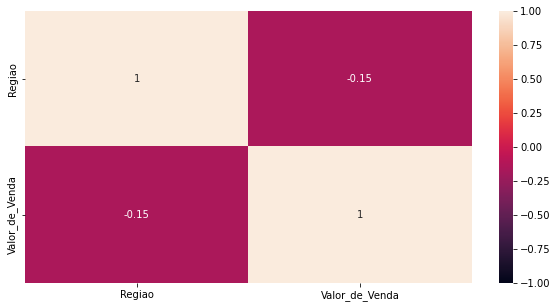

In [ ]:
# Criação do heatmap para melhor visualização da correlação entre região e valor de venda.
plt.figure(figsize=(10,5))
sns.heatmap(df_corr.corr(), vmin=-1.0, vmax=1.0, annot=True)
print()

Após a visualização do heatmap acima pode-se concluir que a correlação entre o valor do combustível e a região onde ele é vendido é uma correlação fraca.

*10*. **Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?**

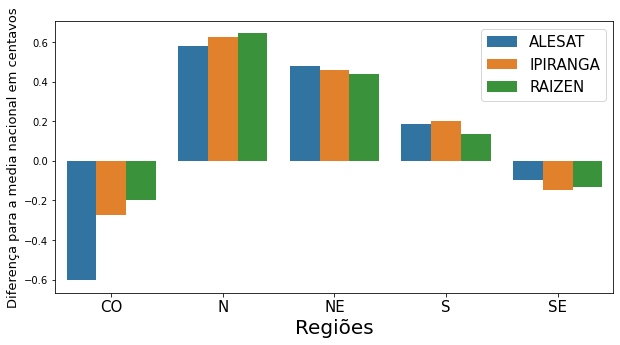

In [ ]:
bandeiras = df_completo[(df_completo['Bandeira'] == 'RAIZEN')|\
                        (df_completo['Bandeira'] == 'PETROBRAS DISTRIBUIDORA S.A.')|\
                        (df_completo['Bandeira'] == 'IPIRANGA')|\
                        (df_completo['Bandeira'] == 'ALESAT')].groupby(['Regiao','Bandeira'])
bandeiras = bandeiras['Valor_de_Venda'].describe()
bandeiras.reset_index(inplace=True)
media_nacional = df_completo['Valor_de_Venda'].mean()
bandeiras['mean'] = bandeiras['mean']- media_nacional #fazendo diferença da média nacioal pela média de acordo com a bandeira e região
plt.figure(figsize=(10,5)) #determinando o tamanho da figura
current_palette_7 = sns.color_palette("hls",4) #usado para colorir o gráfico
ax =sns.barplot(x='Regiao',y='mean',hue='Bandeira',data=bandeiras)
plt.legend(loc='best',prop={'size':15}) #legenda
ax.set_ylabel ( 'Diferença para a media nacional em centavos',fontsize = 13) 
ax.set_xlabel( xlabel='Regiões',fontsize = 20)
plt.xticks(fontsize=15)
print()

com o gráfico acima podemos ver a diferença da média do valor de venda nacional (todas regiões) pela média por região, agrupando por bandeira, conseguimos ver que a bandeira influencia no valor final do produto. As diferenças negativas indicam que a média nacional é maior que a média da região.

*Extra n°1*. **No último mês, qual foi o combustível mais caro e o mais barato ?**

In [ ]:
#filtro do ultimo mês
filtered_df =df_completo.loc[(df_completo['Data da Coleta'] >= '01/08/2022	') & (df_completo['Data da Coleta'] < '31/08/2022')]
filtered_df

,Regiao,Estado,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor_de_Venda,Bandeira
4729,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,ESTACAO EXPERIMENTAL,GASOLINA ADITIVADA,02/08/2022,5.88,VIBRA ENERGIA
4730,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,ESTACAO EXPERIMENTAL,ETANOL,02/08/2022,4.99,VIBRA ENERGIA
4731,N,AC,RIO BRANCO,AUTO POSTO ISAURAO LTDA,ESTACAO EXPERIMENTAL,GASOLINA,02/08/2022,5.85,VIBRA ENERGIA
4732,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,AVIARIO,GASOLINA ADITIVADA,02/08/2022,5.93,VIBRA ENERGIA
4733,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,AVIARIO,GASOLINA,02/08/2022,5.86,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,CATALAO,GASOLINA,29/07/2022,5.38,BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA ADITIVADA,29/07/2022,5.46,BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA,29/07/2022,5.46,BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,VOLTA REDONDA,GASOLINA ADITIVADA,29/07/2022,5.68,BRANCA


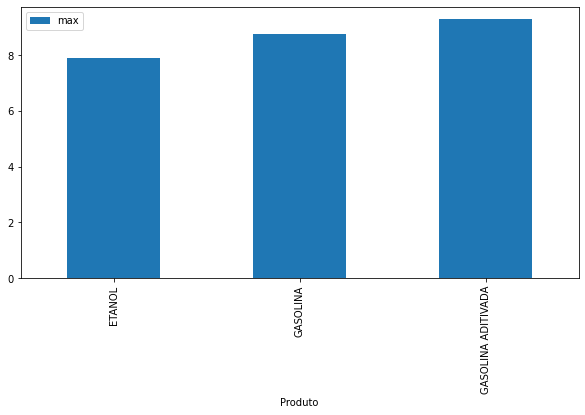

In [ ]:
# usando o df filtrado do mês de agosto, conseguimos agrupar o valor máximo de cada produto e validar qual o mais caro e mais barato nesse ultimo mês
filtered_df.groupby(['Produto'])['Valor_de_Venda'].agg(['max']).plot(kind='bar', figsize=(10,5));

*Extra n°2*. **Qual o valor máximo e mínimo dos combustíveis no período ?**

In [ ]:
df_completo_comb = df_completo
df_completo_comb.groupby(['Produto'])['Valor_de_Venda'].agg(['max','min'])

,max,min
Produto,,
ETANOL,7.89,2.89
GASOLINA,8.75,4.13
GASOLINA ADITIVADA,9.27,4.13


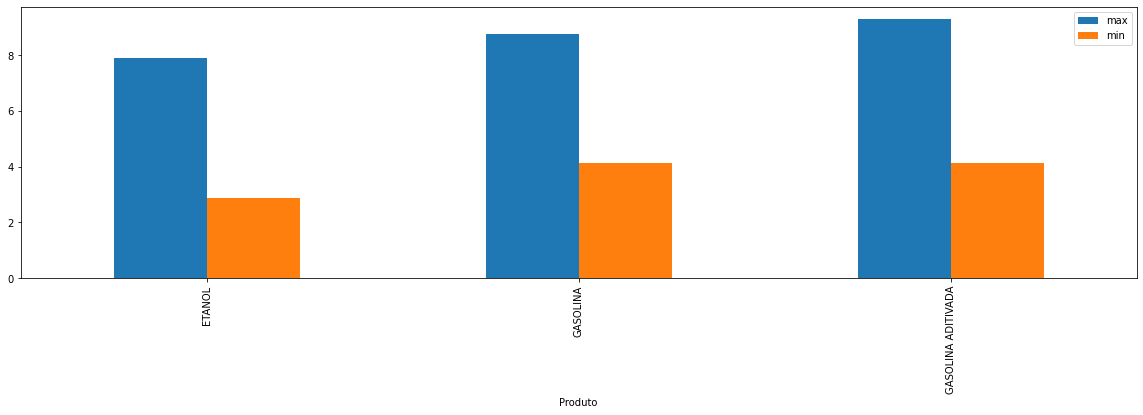

In [ ]:
df_completo_comb = df_completo
df_completo_comb.groupby(['Produto'])['Valor_de_Venda'].agg(['max','min']).plot(kind='bar', figsize=(20,5));